# Классификация

### В качестве датасета я выбрал готовый датасет из библиотеки iris. Датасет содержит измерения чашелистиков и лепестков трех видов ирисов: setosa, versicolor и virginica. Каждый вид представлен 50 экземплярами, что делает его балансированным.

### В данном датасете target представляет собой массив, содержащий числовые метки классов для каждого экземпляра данных. В этом случае, каждое число соответствует определенному виду ириса:

0: setosa
1: versicolor
2: virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета Iris
iris = load_iris()

# Вывод информации о датасете
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target  # Добавление столбца с метками
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = df.drop('target', axis=1)  # X - все столбцы, кроме 'target'
Y = df['target']  # Y - столбец 'target'

In [3]:
X.shape, Y.shape

((150, 4), (150,))

In [4]:
#Дерево решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, 
                                                      test_size=0.3, 
                                                      random_state=13)

In [6]:
X_train.shape, X_valid.shape

((105, 4), (45, 4))

In [7]:
first_tree = DecisionTreeClassifier(random_state=13)

In [8]:
np.mean(cross_val_score(first_tree, X_train, Y_train, cv=5))

0.9428571428571428

### Таким образом, вывод 0.9428571428571428 представляет собой среднюю точность модели дерева решений на обучающем наборе при использовании 5-кратной кросс-валидации. Это означает, что модель показывает хорошую производительность, предсказывая классы с точностью около 94.3%.

In [9]:
#Метод ближайших соседей knn
from sklearn.neighbors import KNeighborsClassifier

In [10]:
first_knn = KNeighborsClassifier()

In [11]:
np.mean(cross_val_score(first_knn, X_train, Y_train, cv=5))

0.9619047619047618

### Вывод 0.9619047619047618 представляет собой среднюю точность модели kNN на обучающем наборе при использовании 5-кратной кросс-валидации. Это значение означает, что она достигает точности около 96.2%. Таким образом, kNN показывает хорошие результаты на данном наборе данных.

## Настраиваем максимальную глубину для дерева

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features': [0.5, 0.7 ,1]}

In [14]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs = -1)

In [15]:
%%time
tree_grid.fit(X_train, Y_train)

CPU times: total: 156 ms
Wall time: 3.42 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [16]:
tree_grid.best_score_, tree_grid.best_params_

(0.9523809523809523, {'max_depth': 3, 'max_features': 0.5})

In [17]:
knn_params = {'n_neighbors': list(range(5, 30, 5)) + list(range(50, 100, 10))}

In [18]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [19]:
%%time
knn_grid.fit(X_train, Y_train);

CPU times: total: 234 ms
Wall time: 232 ms


In [20]:
knn_grid.best_score_, knn_grid.best_params_

(0.9619047619047618, {'n_neighbors': 5})

### Для модели дерева решений лучшая средняя точность составляет примерно 95.24% при максимальной глубине дерева равной 3 и использовании 50% признаков при разделении.

### Для модели kNN лучшая средняя точность составляет примерно 96.19% при числе соседей, равном 5. ( При проверке для kNN для числа соседей от 1 до 4 лучший разельтат составил 95.24% при числе соседей 1)

# Сравним полученные результаты с помощью различных метрик оценки качества

## Accuracy

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
knn_valid_pred = knn_grid.predict(X_valid)

In [23]:
tree_valid_pred = tree_grid.predict(X_valid)

In [24]:
accuracy_score(Y_valid, knn_valid_pred)

0.9111111111111111

In [25]:
accuracy_score(Y_valid, tree_valid_pred)

0.8666666666666667

### Точность(accuracy) - это доля правильных предсказаний относительно общего числа предсказаний. Из этих результатов видно, что на данной валидационной выборке модель kNN показывает более высокую точность по сравнению с моделью дерева решений.

## Presicion, Recall, F-measure

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [27]:
# Precision для модели дерева решений
precision_score(Y_valid, tree_valid_pred, average='weighted')

0.9111111111111111

In [28]:
# Recall для модели дерева решений
recall_score(Y_valid, tree_valid_pred, average='weighted')

0.8666666666666667

In [29]:
# F1-мера для модели дерева решений
f1_score(Y_valid, tree_valid_pred, average='weighted')

0.8675

### ---

In [30]:
# Precision для модели knn
precision_score(Y_valid, knn_valid_pred, average='weighted')

0.9333333333333333

In [31]:
# Recall для модели knn
recall_score(Y_valid, knn_valid_pred, average='weighted')

0.9111111111111111

In [32]:
# F1-мера для модели knn
f1_score(Y_valid, knn_valid_pred, average='weighted')

0.9122315592903828

### Модель kNN показывает более высокие значения точности, полноты и F1-меры по сравнению с моделью дерева решений на данной валидационной выборке.

## ROC

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

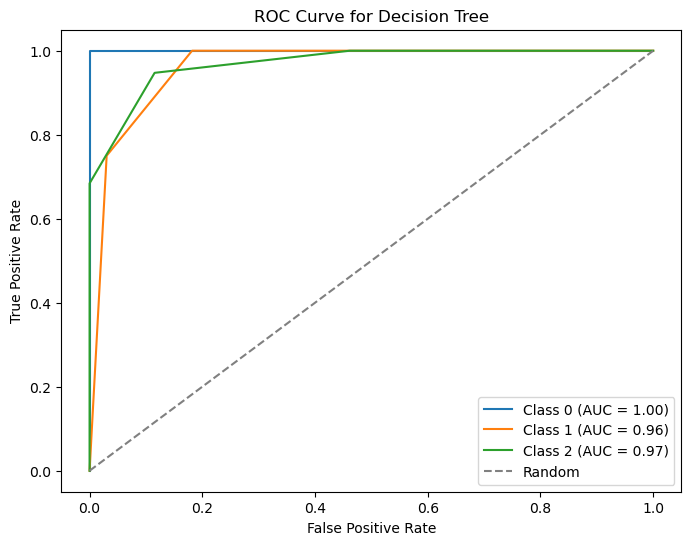

Average AUC-ROC: 0.98


In [34]:
# Вероятности для модели дерева решений
tree_probs = tree_grid.predict_proba(X_valid)

# ROC-кривая для модели дерева решений
n_classes = len(tree_grid.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_valid == i, tree_probs[:, i])
    roc_auc[i] = roc_auc_score((Y_valid == i).astype(int), tree_probs[:, i])

# Средняя AUC-ROC
auc_tree = np.mean(list(roc_auc.values()))

# Отрисовка ROC-кривых
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

print(f"Average AUC-ROC: {auc_tree:.2f}")

### ---

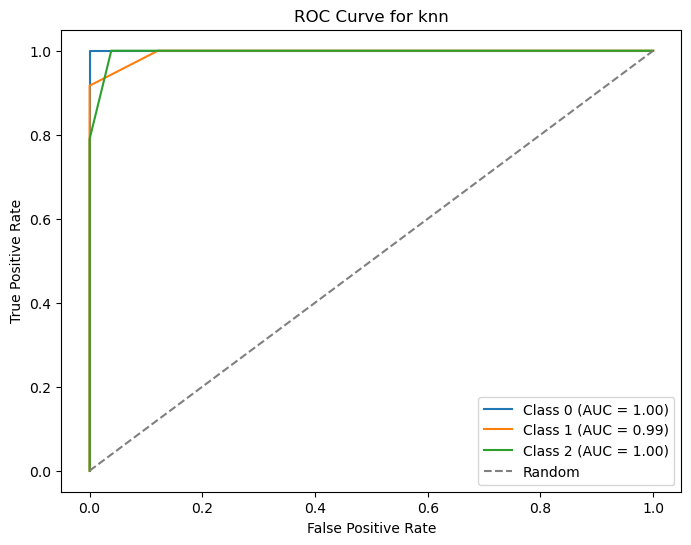

Average AUC-ROC: 1.00


In [35]:
# Вероятности для модели knn
knn_probs = knn_grid.predict_proba(X_valid)

# ROC-кривая для модели дерева решений
n_classes = len(knn_grid.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_valid == i, knn_probs[:, i])
    roc_auc[i] = roc_auc_score((Y_valid == i).astype(int), knn_probs[:, i])

# Средняя AUC-ROC
auc_knn = np.mean(list(roc_auc.values()))

# Отрисовка ROC-кривых
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for knn')
plt.legend()
plt.show()

print(f"Average AUC-ROC: {auc_knn:.2f}")

### Для модели дерева решений среднее значение AUC-ROC составляет примерно 0.98.
### Для модели kNN среднее значение AUC-ROC составляет примерно 1.00.
### AUC-ROC - это площадь под ROC-кривой и предоставляет общую характеристику качества модели в контексте различных порогов классификации. Значение AUC-ROC ближе к 1 указывает на хорошее качество модели. В данном случае, обе модели демонстрируют хорошие результаты, и модель kNN имеет AUC-ROC близкое к идеальному значению 1.00.

# Вывод: 
### Обе модели, дерево решений и метод ближайших соседей, показали хорошие результаты на датасете Iris.
### Модель kNN демонстрировала более высокие значения точности, полноты, F1-меры и AUC-ROC по сравнению с моделью дерева решений на данной валидационной выборке.
### Работа с метриками, кросс-валидацией и настройкой гиперпараметров позволяет получить более надежные и обобщаемые модели машинного обучения.
### Процесс обучения и оценки моделей был успешно выполнен, и результаты могут быть использованы для дальнейшего улучшения моделей или принятия решений в конкретной задаче.